In [1]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

%matplotlib inline

Welcome to JupyROOT 6.12/06


In [2]:
# blinded instance
getBlinded = Blinders(FitType.Omega_a, 'This is my fight song. Blinding my plot song.')
def blinded_wiggle(x, p):
    norm  = p[0]
    life  = p[1]
    asym  = p[2]
    R     = p[3]
    phi   = p[4]
    
    time  = x[0]
    omega = getBlinded.paramToFreq(R) #blind version
    
    return norm * math.exp(-time/life) * (1 - asym*math.cos(omega*time + phi))

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [3]:
params = [2.097 * 10**5,64.45,0.3857,0,-1.059,0.02,200,2.599,0.00]#-0.07523]
#N, tau, A, R, phi, A1CBO, tauCBO, omegaCBO, phiCBO

np.random.seed(123456789)
wiggleMcVec = []
nPos = 1.4 * 10**7
nPosCalo = int(np.ceil(nPos/24))
for calo in range(1,25):
    for i in range(nPosCalo):
        time = np.random.uniform(0,700)
        ding = blinded_wiggle([time],params[:5])
        wiggleMcVec.append((time,ding,calo))

In [4]:
timeVec, wiggleVec, caloVec = zip(*wiggleMcVec)
data = pandas.DataFrame({'time':timeVec, 'wiggle':wiggleVec, 'calo':caloVec})

In [5]:
data.describe()

,time,wiggle,calo
count,1.400002e+07,1.400002e+07,1.400002e+07
mean,3.500058e+02,1.923880e+04,1.250000e+01
std,2.020859e+02,4.215436e+04,6.922187e+00
min,3.413389e-05,2.505277e+00,1.000000e+00
25%,1.749869e+02,5.834136e+01,6.750000e+00
50%,3.500400e+02,8.791066e+02,1.250000e+01
75%,5.250118e+02,1.332781e+04,1.825000e+01
max,7.000000e+02,2.777757e+05,2.400000e+01


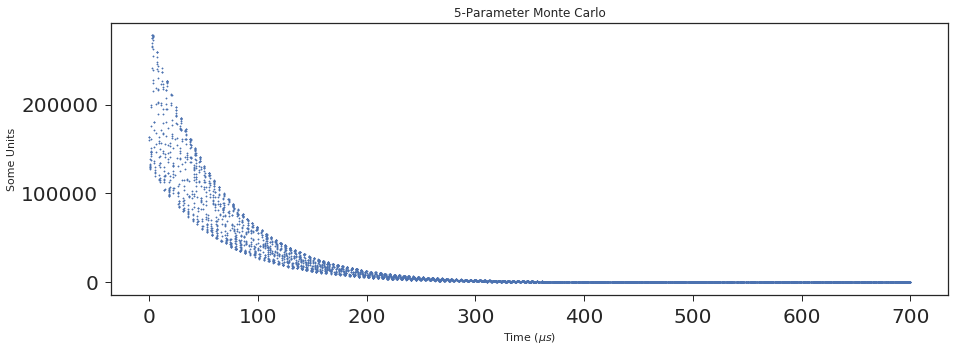

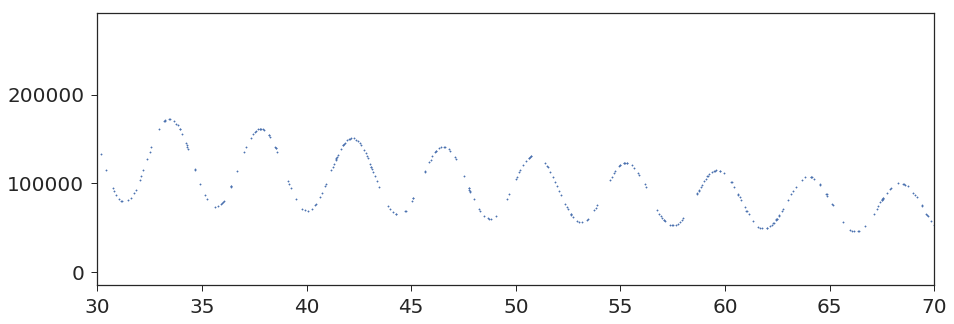

In [143]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.scatter(x=data['time'].loc[data['calo']==1],y=data['wiggle'].loc[data['calo']==1],s=2)
plt.xlabel('Time ($\mu s$)')
plt.ylabel('Some Units')
plt.title('5-Parameter Monte Carlo')
plt.show()

fig, ax = plt.subplots(figsize=(15, 5))
plt.scatter(x=data['time'].loc[data['calo']==1],y=data['wiggle'].loc[data['calo']==1],s=2)
plt.xlim(30,70)
plt.show()

In [6]:
def blinded_wiggle_cbo(x, p):
    norm     = p[0]
    life     = p[1]
    asym     = p[2]
    R        = p[3]
    phi      = p[4]
    A1       = p[5]
    lifeCBO  = p[6]
    omegaCBO = p[7]
    phiCBO1  = p[8]
    
    time  = x[0]
    omega = getBlinded.paramToFreq(R)
    
    cCBO = 1 - math.exp(-time/lifeCBO)*A1*math.cos(omegaCBO*time + phiCBO1)
    
    return norm * math.exp(-time/life) * (1 - asym*math.cos(omega*time + phi)) * cCBO

In [7]:
np.random.seed(123456789)
wiggleMcVecCBO = []
params8init = 0
for calo in range(1,25):
    params[8] = params8init+(np.deg2rad(15))*(calo-1)
    for i in range(nPosCalo):
        time = np.random.uniform(0,700)
        ding = blinded_wiggle_cbo([time],params)
        wiggleMcVecCBO.append((time,ding,calo))

In [8]:
timeVecCBO, wiggleVecCBO, caloVecCBO = zip(*wiggleMcVecCBO)
dataCBO = pandas.DataFrame({'time':timeVecCBO, 'wiggle':wiggleVecCBO, 'calo':caloVecCBO})
dataCBO.head()

,time,wiggle,calo
0,372.983117,690.694992,1
1,373.895621,879.509762,1
2,356.687125,1137.259195,1
3,499.494822,93.453128,1
4,179.899268,8161.570535,1


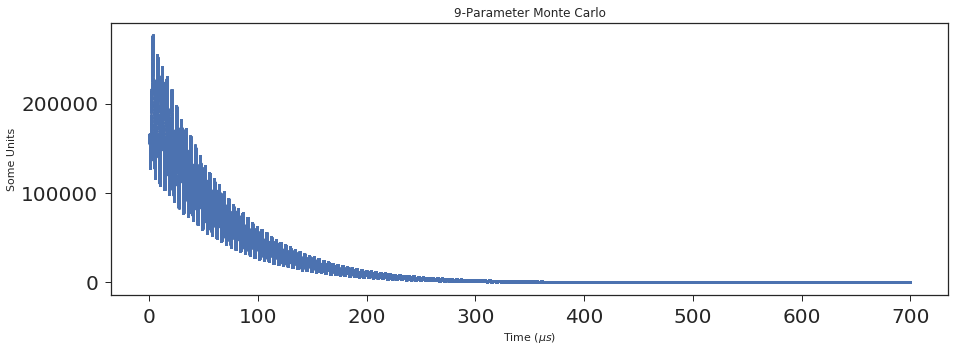

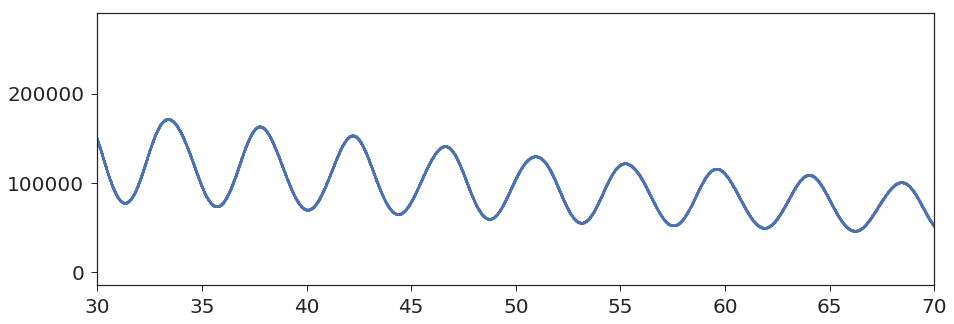

In [190]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.scatter(x=dataCBO['time'].loc[dataCBO['calo']==1],y=dataCBO['wiggle'].loc[dataCBO['calo']==1],s=2)
plt.xlabel('Time ($\mu s$)')
plt.ylabel('Some Units')
plt.title('9-Parameter Monte Carlo')
plt.show()

fig, ax = plt.subplots(figsize=(15, 5))
plt.scatter(x=dataCBO['time'].loc[dataCBO['calo']==1],y=dataCBO['wiggle'].loc[dataCBO['calo']==1],s=2)
plt.xlim(30,70)
plt.show()

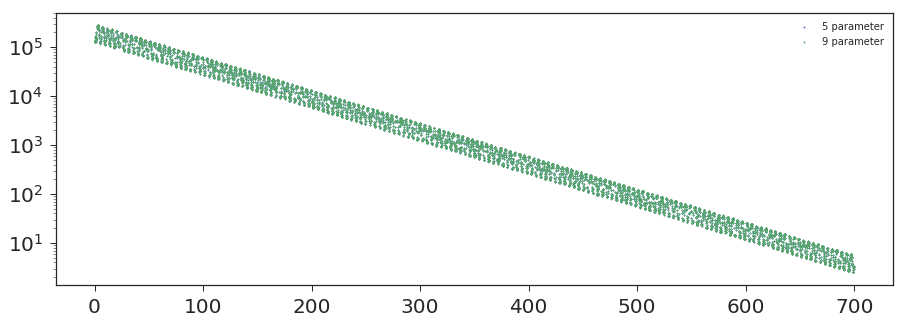

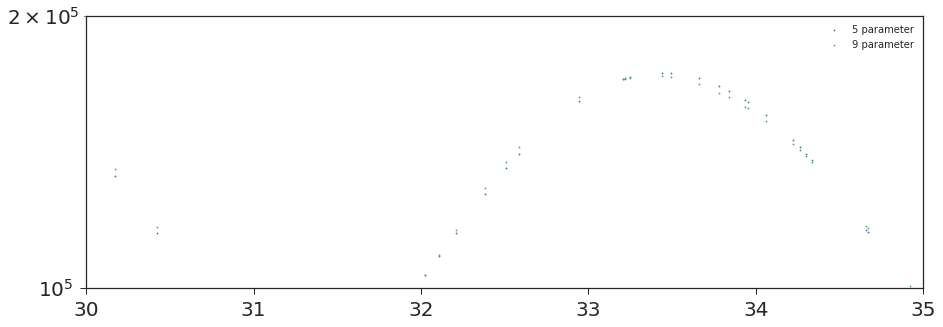

In [148]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.scatter(x=data['time'].loc[data['calo']==1],y=data['wiggle'].loc[data['calo']==1],s=2,label='5 parameter')
plt.scatter(x=dataCBO['time'].loc[dataCBO['calo']==1],y=dataCBO['wiggle'].loc[dataCBO['calo']==1],s=2,label='9 parameter')
plt.yscale('log')
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(15, 5))
plt.scatter(x=data['time'].loc[data['calo']==1],y=data['wiggle'].loc[data['calo']==1],s=2,label='5 parameter')
plt.scatter(x=dataCBO['time'].loc[dataCBO['calo']==1],y=dataCBO['wiggle'].loc[dataCBO['calo']==1],s=2,label='9 parameter')
plt.xlim(30,35)
plt.ylim(100000,200000)
plt.yscale('log')
plt.legend()
plt.show()

In [149]:
'''fig, ax = plt.subplots(figsize=(15, 5))
for calo in range(1,25):
for calo in range(1,5):
    plt.scatter(x=dataCBO['time'].loc[dataCBO['calo']==calo],y=dataCBO['wiggle'].loc[dataCBO['calo']==calo]
                ,s=2,label='9 parameter (calo'+str(calo)+')')
plt.xlim(30,35)
plt.ylim(100000,200000)
plt.yscale('log')
plt.legend()
plt.show()'''

"fig, ax = plt.subplots(figsize=(15, 5))\nfor calo in range(1,25):\nfor calo in range(1,5):\n    plt.scatter(x=dataCBO['time'].loc[dataCBO['calo']==calo],y=dataCBO['wiggle'].loc[dataCBO['calo']==calo]\n                ,s=2,label='9 parameter (calo'+str(calo)+')')\nplt.xlim(30,35)\nplt.ylim(100000,200000)\nplt.yscale('log')\nplt.legend()\nplt.show()"

In [9]:
func = r.TF1("func", blinded_wiggle_cbo, 30,350,9)
func.SetParNames('N','#tau','A','R','#phi','A_{CBO}','#tau_{CBO}','#omega_{CBO}','#phi_{CBO}')
func.SetParameters(2.097 * 10**5,64.45,0.3857,0,-1.059,0.02,200,2.599,0)#-0.07523)
func.SetParLimits(5,0,1)
func.SetParLimits(6,190,210)
func.SetParLimits(8,-0.001,2*math.pi)
func.SetLineColor(2)
func.SetNpx(1000)

Starting Calo 1
    Drawing
    Fitting
[209700.0000020004, 64.45000000093637, 0.3857000000067325, -5.669549096623174e-06, -1.0589999996179718, 0.019999999927184986, 200.00000111720277, 2.598999999018431, 9.09056685614288e-08] [4.310415192732508e-06, 1.1923853233428516e-09, 1.4221244123794094e-11, 7.669957982366056e-07, 7.92718072165429e-11, 4.3485298916025507e-11, 1.4221127768963926e-06, 2.969643770849505e-11, 2.155665241447782e-07]
Starting Calo 2
    Drawing
    Fitting
[209699.99991687268, 64.45000002585306, 0.38570000001226745, 1.6997932338395723e-05, -1.059000001734998, 0.019999999837328475, 200.00001048958495, 2.5989999995372672, 0.2617994124904452] [2.35147858857419e-06, 6.496972690286647e-10, 1.0007640365587232e-11, 3.722316099938208e-07, 3.676495186341235e-11, 2.9158737281114294e-11, 9.709754486577956e-07, 2.499142770923648e-11, 1.5381804353364962e-09]
Starting Calo 3
    Drawing
    Fitting
[209699.99999876748, 64.4499999995864, 0.385699999986874, -3.4301903562174553e-09, -1

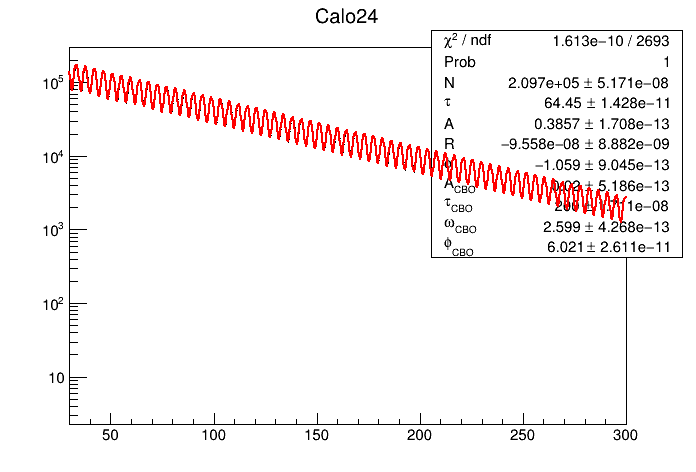

In [174]:
paramVec = []
paramErrVec = []
for calo in range(1,25):
    print("Starting Calo",calo)
    tempdf  = dataCBO.loc[dataCBO['calo'] == calo]
    timeVecCBO = tempdf['time'].values
    wiggleVecCBO = tempdf['wiggle'].values
    c = r.TCanvas()
    print("    Drawing")
    gr = r.TGraph(len(timeVecCBO), timeVecCBO, wiggleVecCBO)
    gr.SetTitle("Calo"+str(calo))
    gr.Draw("ap")
    gr.GetXaxis().SetRangeUser(30,300)
        
    print("    Fitting")
    gr.Fit('func','R')
    func.Draw("same")
    
    ding = func.GetParameters()
    ding2 = func.GetParErrors()
    paramsFit = []
    paramsErrFit = []
    for i in range(len(params)):
        paramsFit.append(ding[i])
        paramsErrFit.append(ding2[i])
    print(paramsFit,paramsErrFit)
    paramVec.append(paramsFit)
    paramErrVec.append(paramsErrFit)
    
    c.SetLogy()
#    c.Print("./images/CBO/CBO_Sim_Calo"+str(calo).zfill(2)+".png")
    c.Draw()

In [164]:
print(paramVec)
print(paramErrVec)
print(paramVec[0][8],paramVec[1][8])

[[209700.00000282482, 64.44999999799725, 0.38570000002195487, 3.9857333319236925e-08, -1.058999999802797, 0.02000000086487931, 199.99997344380137, 2.598999999305474, 5.5438875936977054e-08], [209699.99993047403, 64.45000001914597, 0.38570000000493304, 1.3181655211116158e-05, -1.059000001337029, 0.01999999980242206, 200.0000067539058, 2.5989999999943216, 0.261799387583668], [209700.00000331996, 64.45000000093667, 0.38570000001496874, -5.415040088872212e-08, -1.0590000000301674, 0.019999999993567233, 199.99999932602574, 2.598999999798746, 0.5235987850213444], [209700.00000110932, 64.44999999969839, 0.38569999999915955, -4.580626071211489e-08, -1.0589999999973738, 0.01999999998868361, 200.00000025517588, 2.599000000022504, 0.7853981621913908], [209700.00004990038, 64.44999998842933, 0.3856999999574141, 2.707056039910166e-08, -1.0590000003358155, 0.019999999521285776, 200.00001226509642, 2.5989999999341156, 1.0471975490709826], [209699.99997211338, 64.45000001027225, 0.3856999996890124, -1

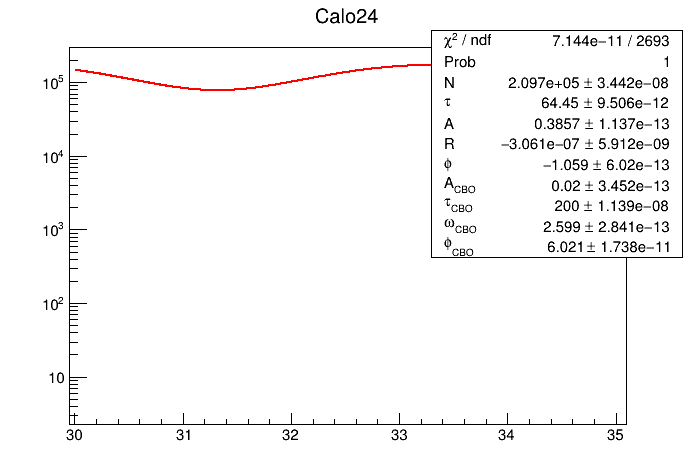

In [153]:
gr.Draw("ap")
gr.GetXaxis().SetRangeUser(30,35)
c.Draw()

1 1.7416636536688308e-07 5.5438875936977054e-08 5.5438875936977054e-08
2 0.8224672069135236 0.26179944302254393 0.261799387583668
3 2.4674013033651203 0.7853982280438883 0.5235987850213444
4 4.934802399848518 1.570796390235279 0.7853981621913908
5 1.9414852196875674 2.6179939393062615 1.0471975490709826
6 6.053820447124173 3.9269908975012005 1.308996958194939
7 4.705437336689063 5.497787223086455 1.5707963255852546
8 4.179520566846636 7.330382715935765 1.83259549284931
9 4.476071523558086 9.42477781721428 2.0943951012785167
10 5.595089517066972 11.780972307365708 2.356194490151428
11 1.253389237664476 14.398966185584968 2.6179938782192593
12 4.017341280458779 17.278759445744278 2.8797932601593095
13 1.3205750503560758 20.420352093975996 3.1415926482317174
14 5.7294611841609715 23.823744137424725 3.40339204344873
15 4.677629031349171 27.48893556457875 3.665191427154025
16 4.448263908690872 31.415926378490855 3.926990813912107
17 5.041365837592413 35.60471658597489 4.188790207484038
18 0

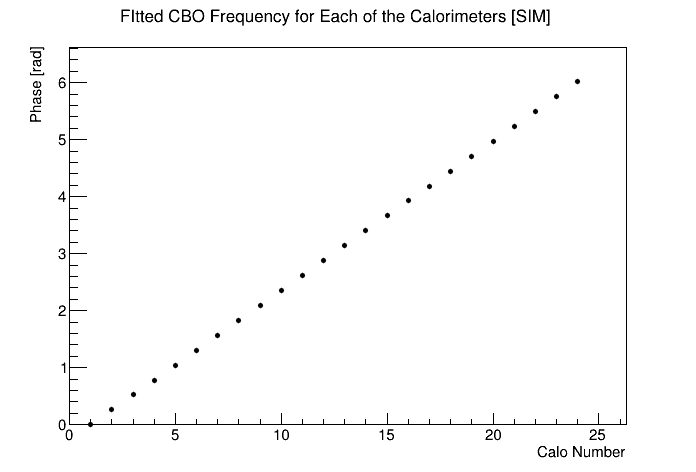

In [165]:
grCBO = r.TGraph()
cboSUM = 0
for calo in range(1,25):
    cboCaloi = paramVec[calo-1][8]
    cboSUM = cboSUM + cboCaloi
    print(calo, cboSUM % 2*math.pi, cboSUM, cboCaloi)
    grCBO.SetPoint(calo-1,calo,cboCaloi)
c=r.TCanvas() 
grCBO.SetTitle("FItted CBO Frequency for Each of the Calorimeters [SIM]")
grCBO.GetXaxis().SetTitle("Calo Number")
grCBO.GetYaxis().SetTitle("Phase [rad]")
grCBO.SetMarkerStyle(20)
grCBO.SetMarkerSize(.5)
grCBO.Draw("ap")
c.Draw()

In [155]:
print((cboSUM ))
print((cboSUM % 2*math.pi),"mod 2 pi")
print((cboSUM % 2*math.pi)/math.pi,"pi")

72.25663092528501
0.8062298295593353 mod 2 pi
0.25663092528500897 pi


Starting All Calos
    Drawing
    Fitting
[209686.67021135095, 64.44843590167167, 0.3858792870542585, -7.329410235748388, -1.0584914408150783, 0.00036040562016365074, 190.0000179324411, 2.624129981386332, 1.4821433922413798] [19.260724905002938, 0.00540577422187864, 6.291652917002882e-05, 3.4025968658685612, 0.000342009084898634, 9.00468650030525e-05, 10.152222439745442, 0.010551449875884725, 0.6121795063450464]
 **********
 ** 2005 **SET PRINT           2
 **********
 **********
 ** 2006 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 N            2.09700e+05  6.29100e+04     no limits
     2 #tau         6.44500e+01  1.93350e+01     no limits
     3 A            3.85700e-01  1.15710e-01     no limits
     4 R            0.00000e+00  3.00000e-01     no limits
     5 #phi        -1.05900e+00  3.17700e-01     no limits
     6 A_{CBO}      2.00000e-02  1.00000e-02    0.00000e+00  1.00000e+00
     7 #tau_{CBO}   2.00000e+02 

Info in <TMinuitMinimizer::Minimize>: Finished to run MIGRAD - status 0
Info in <TMinuitMinimizer::Minimize>: Finished to run IMPROVE - status 4
Info in <TMinuitMinimizer::Minimize>: Finished to run HESSE - status 0
Info in <TCanvas::Print>: png file ./images/CBO/CBO_Sim_Calo_All.png has been created


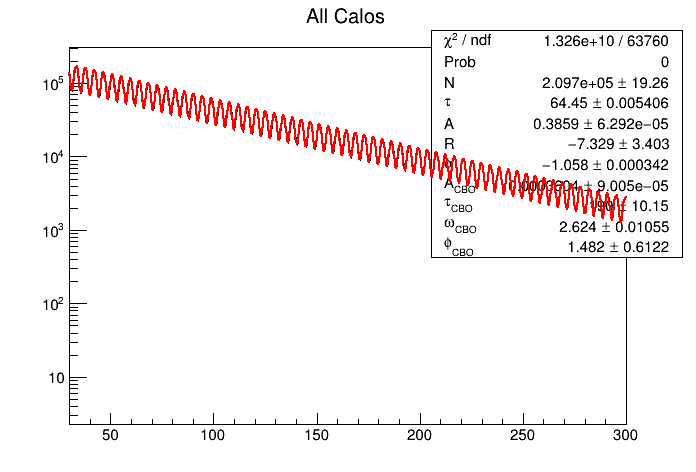

In [172]:
print("Starting All Calos")
tempdf  = dataCBO
timeVecCBO = tempdf['time'].values
wiggleVecCBO = tempdf['wiggle'].values
c = r.TCanvas()
print("    Drawing")
gr = r.TGraph(len(timeVecCBO), timeVecCBO, wiggleVecCBO)
gr.SetTitle("All Calos")
gr.Draw("ap")
gr.GetXaxis().SetRangeUser(30,300)

print("    Fitting")
gr.Fit('func','REM')
func.Draw("same")

ding = func.GetParameters()
ding2 = func.GetParErrors()
paramsFit = []
paramsErrFit = []
for i in range(len(params)):
    paramsFit.append(ding[i])
    paramsErrFit.append(ding2[i])
print(paramsFit,paramsErrFit)

c.SetLogy()
c.Print("./images/CBO/CBO_Sim_Calo_All.png")
c.Draw()

In [173]:
print((paramsFit[8] ))
print((paramsFit[8] % 2*math.pi),"mod 2 pi")
print((paramsFit[8] % 2*math.pi)/math.pi,"pi")

1.4821433922413798
4.656290792632174 mod 2 pi
1.48214339224138 pi


Now lets try creating/fittinghistograms instead of the tgraphs, because I'm out of ideas

Starting Calo 1
    Filling
    Projecting (all of my issues)
    Fitting
[209766.45941670635, 64.43388284593216, 0.38580241252972536, 0.6965019246930031, -1.058916723734105, 0.01964318956287131, 209.99999999999486, 2.5991316338353365, -0.0009999999999832556] [0.00010685294466567153, 2.1896469898942812e-08, 2.0798477182353632e-10, 1.3463161818011462e-05, 1.8325373216058084e-09, 3.6761615973546213e-10, 2.8180124900245573e-11, 2.17199036853411e-10, 2.2238699597110223e-13]
    Drawing
Starting Calo 2
    Filling
    Projecting (all of my issues)
    Fitting
[209707.0670418284, 64.44979966402566, 0.3856551688663265, -10.428104285661336, -1.0578112007107903, 0.01992624378991187, 201.7934672533304, 2.5992812291815217, 0.2446755951420239] [0.00011153491906007839, 2.2888934268587553e-08, 2.091100098873531e-10, 1.4307669445429242e-05, 1.9623674943294616e-09, 1.047184144953306e-09, 2.4519790997601376e-05, 6.245833448117863e-10, 5.316925984211185e-08]
    Drawing
Starting Calo 3
    Filling
    P

Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).


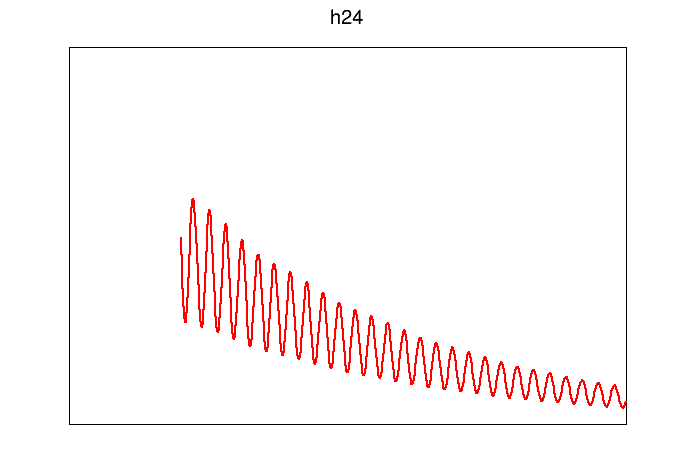

In [17]:
paramVec = []
paramErrVec = []
histVec = []

for calo in range(1,25):
    print("Starting Calo",calo)
    tempdf  = dataCBO.loc[dataCBO['calo'] == calo]
    timeVecCBO = tempdf['time'].values
    wiggleVecCBO = tempdf['wiggle'].values
    c = r.TCanvas()
    print("    Filling")
    #create/fill a TH2 and then project onto the x-axis
    h1 = r.TH2D("h1","h"+str(calo),700000,0,700,3000,0,1000000)
    for i in range(len(timeVecCBO)):
        h1.Fill(timeVecCBO[i], wiggleVecCBO[i])

    print("    Projecting (all of my issues)")
    h2 = h1.ProfileX()
    h2.GetXaxis().SetRangeUser(0,150)
    
    print("    Fitting")
    h2.Fit('func','R')
    h2.Draw()
    func.Draw("SAME")
    
    ding = func.GetParameters()
    ding2 = func.GetParErrors()
    paramsFit = []
    paramsErrFit = []
    for i in range(len(params)):
        paramsFit.append(ding[i])
        paramsErrFit.append(ding2[i])
    print(paramsFit,paramsErrFit)
    paramVec.append(paramsFit)
    paramErrVec.append(paramsErrFit)
    
    print("    Drawing")
    c.Draw()
    
    histVec.append( h2.Clone("h"+str(calo)) )
    
    h1.Delete()
    h2.Delete()
    
#    c.Print("./images/CBO/CBO_Sim_Calo"+str(calo).zfill(2)+".png")

[<ROOT.TProfile object ("h1") at 0x7fffe8e495e0>, <ROOT.TProfile object ("h2") at 0x7f5df4bffcb0>, <ROOT.TProfile object ("h3") at 0x7fffe8f9e9b0>, <ROOT.TProfile object ("h4") at 0x7f5df4bfbd90>, <ROOT.TProfile object ("h5") at 0x7f5df4c17790>, <ROOT.TProfile object ("h6") at 0x7f5df4c0fa30>, <ROOT.TProfile object ("h7") at 0x7f5de9efc9d0>, <ROOT.TProfile object ("h8") at 0x7f5df4bf1d50>, <ROOT.TProfile object ("h9") at 0x7f5df4c11e30>, <ROOT.TProfile object ("h10") at 0x7f5df4c08850>, <ROOT.TProfile object ("h11") at 0x7f5df4bf8540>, <ROOT.TProfile object ("h12") at 0x7f5df4bfefc0>, <ROOT.TProfile object ("h13") at 0x7fffe8d27020>, <ROOT.TProfile object ("h14") at 0x7f5df4bf65e0>, <ROOT.TProfile object ("h15") at 0x7f5df4bf73b0>, <ROOT.TProfile object ("h16") at 0x7f5df4c07f40>, <ROOT.TProfile object ("h17") at 0x7f5df5f19150>, <ROOT.TProfile object ("h18") at 0x7f5df4c02f50>, <ROOT.TProfile object ("h19") at 0x7f5df5f17b60>, <ROOT.TProfile object ("h20") at 0x7f5db8b5dbe0>, <ROOT.TP

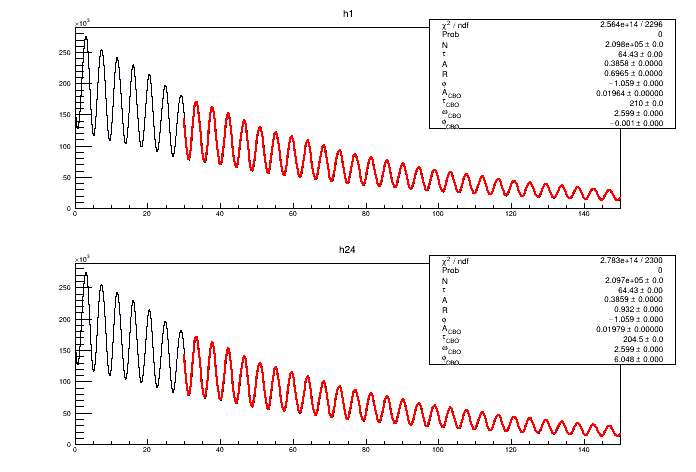

In [18]:
print(histVec)
c2 = r.TCanvas()
c2.Divide(1,2)
c2.cd(1)
histVec[0].Draw()
c2.cd(2)
histVec[23].Draw()
c2.Draw()

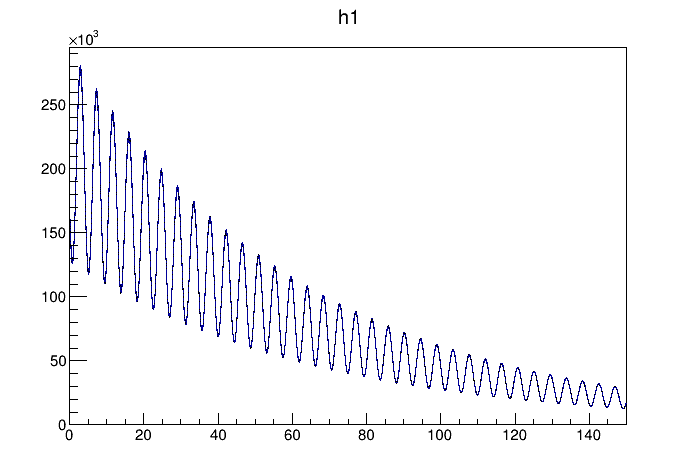

In [20]:
hTotal = histVec[0].Clone("hTotal")
(hTotal.GetFunction("func")).Delete()
hTotal.SetTitle("hTotal")

for i,hist in enumerate(histVec):
    if i > 0:
        hTotal.Add(hist,1)
        
c3 = r.TCanvas()
hTotal.Draw()
c3.Draw()

In [ ]:
c3 = r.TCanvas()
hTotal.Draw()
func.SetParameter(8,0)
hTotal.Fit("func","REMB V")
func.Draw("SAME")
c3.Draw()

In [22]:
import csv

out = open('CBO_hist_byCalo_fitParams_2.csv','w')
csv_out = csv.writer(out)
func.SetParNames()
csv_out.writerow(['N','tau','A','R','phi','ACBO','tauCBO','omegaCBO','phiCBO'])
for i in range(len(paramVec)):
    csv_out.writerow(paramVec[i])
out.close()

In [23]:
import csv

out = open('CBO_hist_byCalo_fitParams_err_2.csv','w')
csv_out = csv.writer(out)
func.SetParNames()
csv_out.writerow(['N','tau','A','R','phi','ACBO','tauCBO','omegaCBO','phiCBO'])
for i in range(len(paramErrVec)):
    csv_out.writerow(paramErrVec[i])
out.close()